<a href="https://colab.research.google.com/github/LilianYou/dark-lily/blob/master/1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PSYCH239 Lecture 1: Perceptron Learning Rule

In [0]:
import numpy as np

Create Data (This data is linearly separable). We use here a trick that subsumes the bias into a weight, whose input is always 1

In [0]:
X = np.array([[ 1, 0.04187914, -0.16537444],
        [ 1, 0.13746733,  0.60397647],
        [ 1, 0.68489807,  0.78038369],
        [ 1, 0.64652619, -0.05249682],
        [1, -0.80712692,  0.68521631]])
Y = np.array([-1,  1,  1, -1,  1])

In [0]:
w = np.random.rand(len(X[0])) #first dimension is the bias
w

array([0.34870028, 0.22133861, 0.84540367])

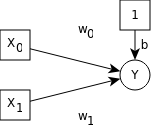

Of course, our prediction is incorrect:


In [0]:
hatY = np.sign(X@w) #"@"" is a short hand for np.dot (=matrix product)
hatY

array([1., 1., 1., 1., 1.])

Now, let's calculate the error using the perceptron criterion


In [0]:
error = hatY!=Y
error

array([ True, False, False,  True, False])

In [0]:
miscls = np.where(error)[0]
miscls

array([0, 3])

Select one misclassified data sample at random:

In [0]:
miscls_sample_index = miscls[np.random.randint(0,len(miscls))]
x = X[miscls_sample_index]
y = Y[miscls_sample_index]

Let's make an update. We will use a learning rate equal to .1

In [0]:
w = w + .1*y*x

In [0]:
hatY = np.sign(X@w) #"@"" is a short hand for np.dot (=matrix product)
hatY==Y

array([False,  True,  True, False,  True])

In [0]:
w

array([0.24870028, 0.21715069, 0.86194111])

This will need several iterations, so let's write it in a function

In [0]:
def train(X,Y,w):
    hatY = np.sign(X@w) #"@"" is a short hand for np.dot (=matrix product)
    error = hatY!=Y
    miscls = np.where(error)[0]
    if len(miscls)>0:
        miscls_sample_index = miscls[np.random.randint(0,len(miscls))]
        x = X[miscls_sample_index]
        y = Y[miscls_sample_index]
        w +=.1*y*x
    return miscls

In [0]:
while len(miscls)>0:
    miscls = train(X,Y,w)
    print(len(miscls))

2
2
1
0


In [0]:
np.sign(X@w)

array([-1.,  1.,  1., -1.,  1.])